# Home Credit Default Project

# Part 1: Data Cleaning, Exploratory Data Analysis

## Team "Future Work":
- ## Jorrik Fulda
- ## Dennis Aschenbrenner
- ## Daniel Büttner



In [1]:
# import relevant modules and datasets:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# only import 'train' dataset since 'test' dataset does not include 'TARGET' variable:
file = '/Users/dbuettner/nf-ds/Week_6/Group_Project/Data/Home Loan/application_train.csv'

df = pd.read_csv(file)
df_copy = df.copy()

In [3]:
#pd.set_option('display.max_columns', 130)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [6]:
pd.set_option('display.max_columns', 130)
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [7]:
df.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [8]:
df.tail(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307501,456245,0,Cash loans,F,N,Y,3,81000.0,269550.0,11871.0,225000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.009175,-12961,-1046,-1398.0,-3780,NaN,1,1,1,1,0,0,Low-skill Laborers,5.0,2,2,WEDNESDAY,14,0,0,0,0,0,0,Industry: type 1,NaN,0.575481,NaN,0.0392,0.0827,0.9846,NaN,NaN,0.00,0.0345,0.0417,NaN,0.0144,NaN,0.0189,NaN,0.0000,0.0399,0.0858,0.9846,NaN,NaN,0.0000,0.0345,0.0417,NaN,0.0147,NaN,0.0197,NaN,0.0000,0.0396,0.0827,0.9846,NaN,NaN,0.00,0.0345,0.0417,NaN,0.0146,NaN,0.0192,NaN,0.0000,NaN,block of flats,0.0149,"Stone, brick",No,2.0,1.0,2.0,1.0,-448.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307502,456246,0,Cash loans,F,N,Y,1,94500.0,225000.0,10620.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010966,-16063,-8736,-8672.0,-4531,NaN,1,1,1,1,0,0,Laborers,3.0,2,2,MONDAY,16,0,0,0,0,1,1,School,NaN,0.313334,0.735221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1516.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
307503,456247,0,Cash loans,F,N,Y,0,112500.0,345510.0,17770.5,247500.0,Unaccompanied,Commercial associate,Higher education,Single / not married,House / apartment,0.022800,-11870,-399,-675.0,-3936,NaN,1,1,0,1,0,1,Core staff,1.0,2,2,SATURDAY,11,0,0,0,0,0,0,Bank,0.243466,0.501221,0.609276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,3.0,9.0,2.0,-2315.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0
307504,456248,0,Cas

In [9]:
df.nunique().sort_values(ascending=False)

SK_ID_CURR                    307511
EXT_SOURCE_2                  119831
EXT_SOURCE_1                  114584
DAYS_BIRTH                     17460
DAYS_REGISTRATION              15688
AMT_ANNUITY                    13672
DAYS_EMPLOYED                  12574
DAYS_ID_PUBLISH                 6168
AMT_CREDIT                      5603
LIVINGAREA_MODE                 5301
LIVINGAREA_MEDI                 5281
LIVINGAREA_AVG                  5199
TOTALAREA_MODE                  5116
BASEMENTAREA_MODE               3841
BASEMENTAREA_AVG                3780
DAYS_LAST_PHONE_CHANGE          3773
BASEMENTAREA_MEDI               3772
LANDAREA_MODE                   3563
LANDAREA_MEDI                   3560
LANDAREA_AVG                    3527
NONLIVINGAREA_MODE              3327
NONLIVINGAREA_MEDI              3323
NONLIVINGAREA_AVG               3290
COMMONAREA_MEDI                 3202
COMMONAREA_AVG                  3181
COMMONAREA_MODE                 3128
AMT_INCOME_TOTAL                2548
A

## Target Variable:

In [10]:
df.TARGET.value_counts(dropna=False)

0    282686
1     24825
Name: TARGET, dtype: int64

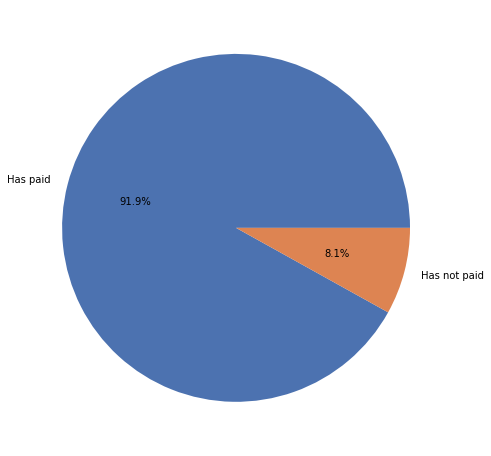

In [11]:
sns.set_palette('deep')
plt.figure(figsize=(10,8))
plt.pie(df.TARGET.value_counts().div(len(df)).mul(100), labels=['Has paid', 'Has not paid'], autopct='%1.1f%%')
plt.show()

The dataset is highly imbalanced as there are many more loans that have been repaid compared to loans which have been defaulted.

## Missing Values

In [12]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = total/len(data)*100
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) 

missing_data(df).head(10)

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953


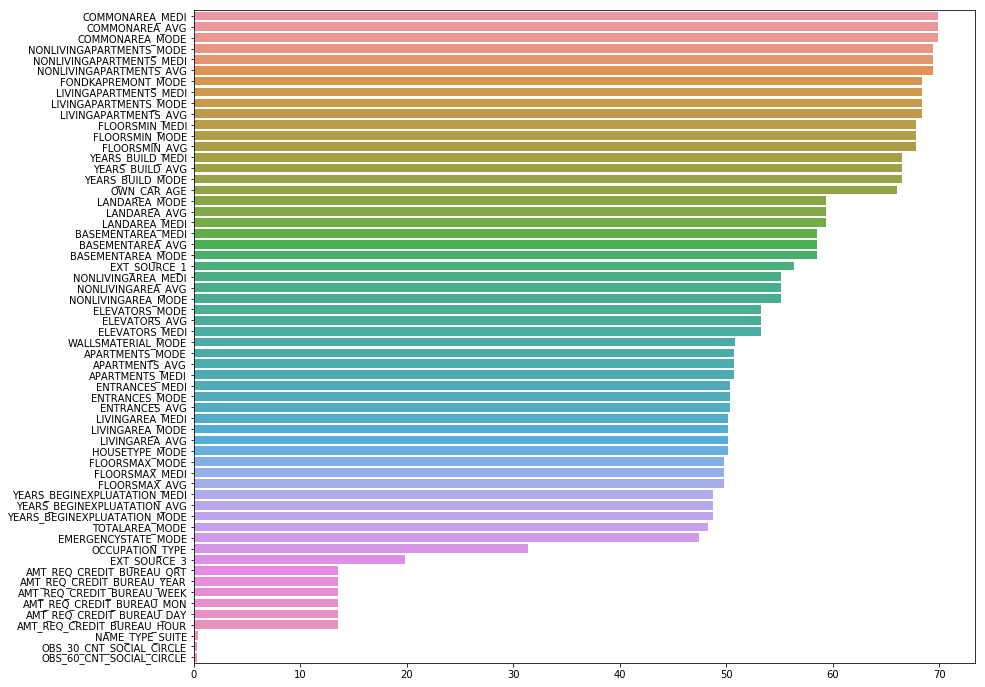

In [13]:
#sns.set_palette("coolwarm", 7)
perc = ((df.isnull().sum()/len(df)*100)).sort_values(ascending=False)
plt.figure(figsize=(14,12))
ax = sns.barplot(y=perc.index[:60], x=perc[:60])
plt.show()

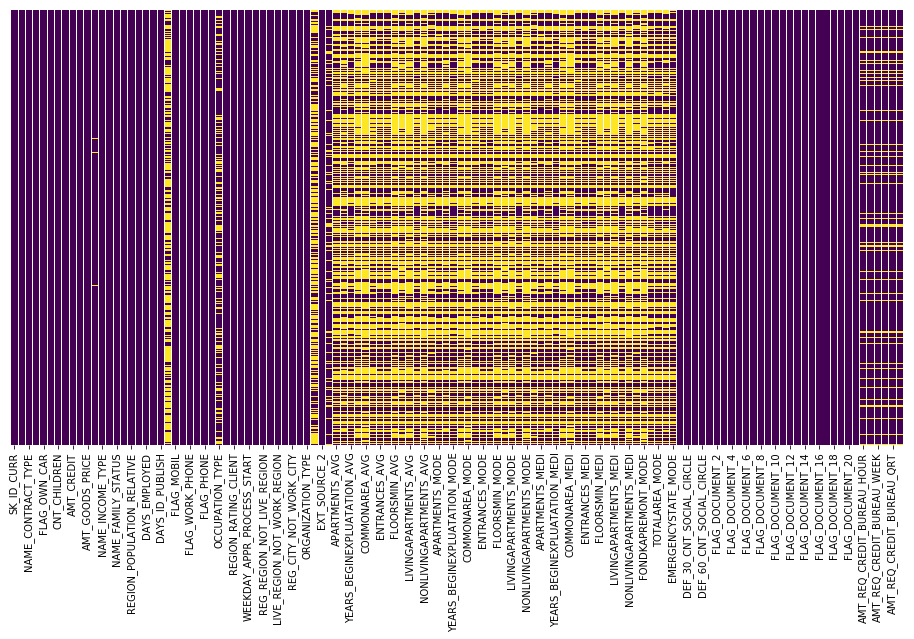

In [14]:
# yellow = missing values - NaN´s
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16, 8))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [15]:
duplicate_rows_df = df[df.duplicated()]    # no duplicates
print ("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 122)


## Data Cleaning: Outliers, remove housing columns (mostly missing values)

In [17]:
remove_building = False

if remove_building == True:
    perc = ((df.isnull().sum()/len(df)*100)).sort_values(ascending=False)
    building_list = list(perc.index[:49])
    building_list.remove('OWN_CAR_AGE')
    building_list.remove('EXT_SOURCE_1')
    building_list
    df2 = df.copy()
    df.drop(building_list, inplace=True, axis=1)
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 75 columns):
SK_ID_CURR                     307511 non-null int64
TARGET                         307511 non-null int64
NAME_CONTRACT_TYPE             307511 non-null object
CODE_GENDER                    307511 non-null object
FLAG_OWN_CAR                   307511 non-null object
FLAG_OWN_REALTY                307511 non-null object
CNT_CHILDREN                   307511 non-null int64
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
AMT_ANNUITY                    307499 non-null float64
AMT_GOODS_PRICE                307233 non-null float64
NAME_TYPE_SUITE                306219 non-null object
NAME_INCOME_TYPE               307511 non-null object
NAME_EDUCATION_TYPE            307511 non-null object
NAME_FAMILY_STATUS             307511 non-null object
NAME_HOUSING_TYPE              307511 non-null object
REGION_POPULATION_RELATI

In [18]:
# remove 4 rows with missing values/information on gender

df = df[df.CODE_GENDER != 'XNA']
sum(df.CODE_GENDER == 'XNA')

0

In [19]:
sum(df.DAYS_EMPLOYED == 365243)

55374

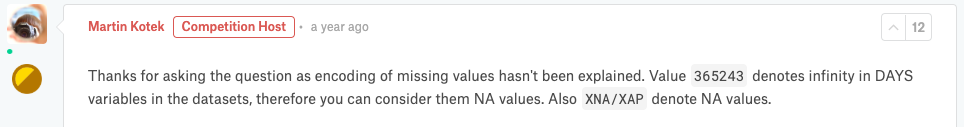

In [20]:
# Set 1000 year values for variable 'DAYS_EMPLOYED' to missing value (later imputed by median):

df.loc[df[df.DAYS_EMPLOYED == 365243].index, 'DAYS_EMPLOYED'] = np.nan
sum(df.DAYS_EMPLOYED == 365243)

0

## Exploratory Data Analysis:

In [21]:
# Plotting the number of contracts per feature and the respective default rate:
# shown as red dotted line is the average default rate

def plot_stats(feature, label_rotation1=False, label_rotation2=False, horizontal_layout=True):
    
    temp = df[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    #cat_perc = df[[feature, 'TARGET']].groupby(feature, as_index=False).mean()
    cat_perc = df[[feature, 'TARGET']].groupby(feature).mean().mul(100)
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10,14))
    
    #sns.set_color_codes("pastel") # pastel
    sns.set_palette('Paired')
    s = sns.barplot(ax=ax1,
                    x=feature,
                    y="Number of contracts",
                    data=df1)    
    if(label_rotation1):
        s.set_xticklabels(s.get_xticklabels(),rotation=45)
    if(label_rotation2):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
        
    s = sns.barplot(ax=ax2,
                    #x=feature,
                    x=cat_perc.index,
                    y='TARGET',
                    #order=cat_perc[feature],
                    data=cat_perc)
    
    ax2.axhline(df.TARGET.mean()*100, ls='--', c='red', label='Mean')
    ax2.axhline(df.TARGET.mean()*100, ls='--', c='red', label='Mean')
    #ax2.text(1, df.TARGET.mean()*100+0.1, 'Mean of Target')
    #ax2.text(right, df.TARGET.mean()*100+0.1, 'Mean of Target')
    #plt.hlines(df.TARGET.mean()*100, xmin=0, xmax=1, ls='--', c='red', label='Mean')
    #if(label_rotation):
    #    s.set_xticklabels(s.get_xticklabels(),rotation=90)
        
    if(label_rotation1):
        s.set_xticklabels(s.get_xticklabels(),rotation=45)
    if(label_rotation2):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
        
    plt.ylabel('Default Rate [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    
    
    plt.tight_layout()
    plt.show()

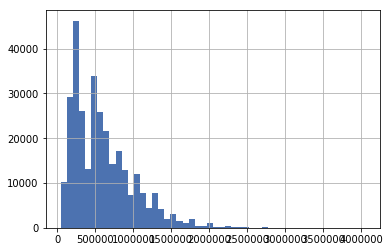

In [22]:
#plot_stats('AMT_CREDIT', False, False, True)
df.AMT_CREDIT.hist(bins=50)
plt.show()

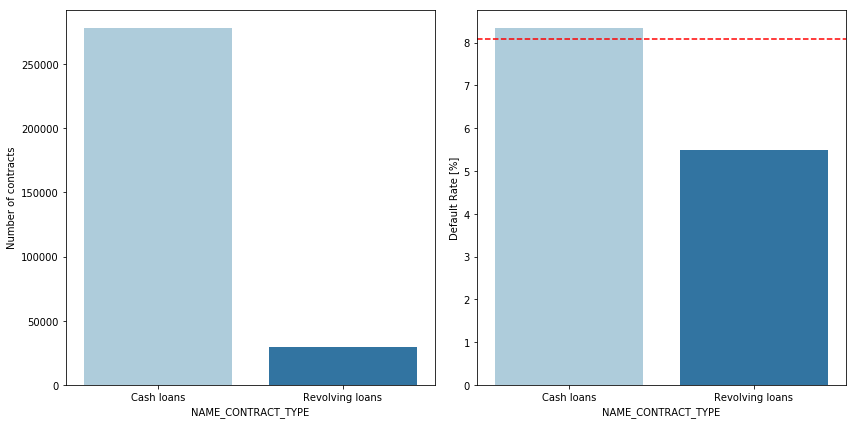

In [23]:
plot_stats('NAME_CONTRACT_TYPE', False, False, True)

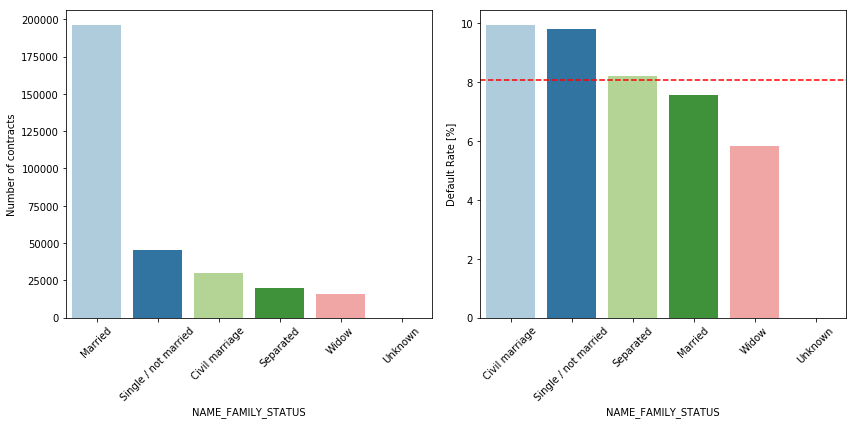

In [24]:
plot_stats('NAME_FAMILY_STATUS', True, False, True)

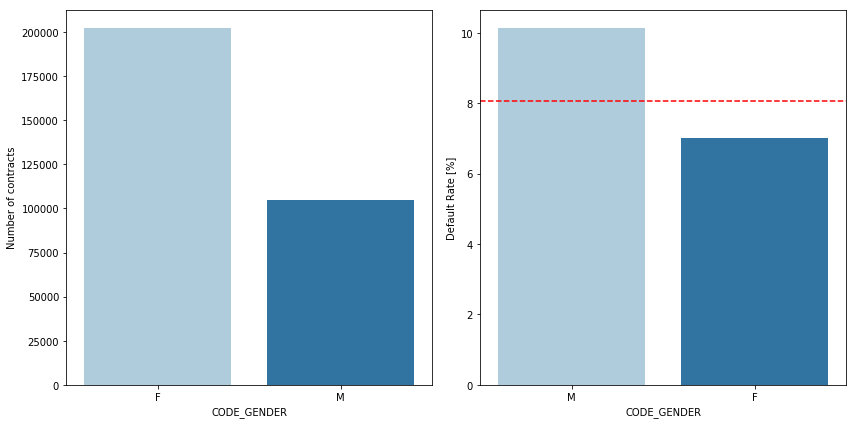

In [25]:
plot_stats('CODE_GENDER', False, False, True)

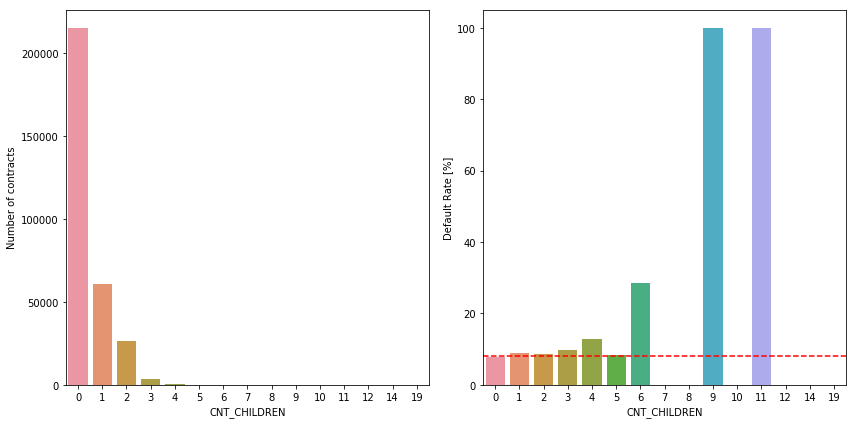

In [26]:
plot_stats('CNT_CHILDREN', False, False, True)

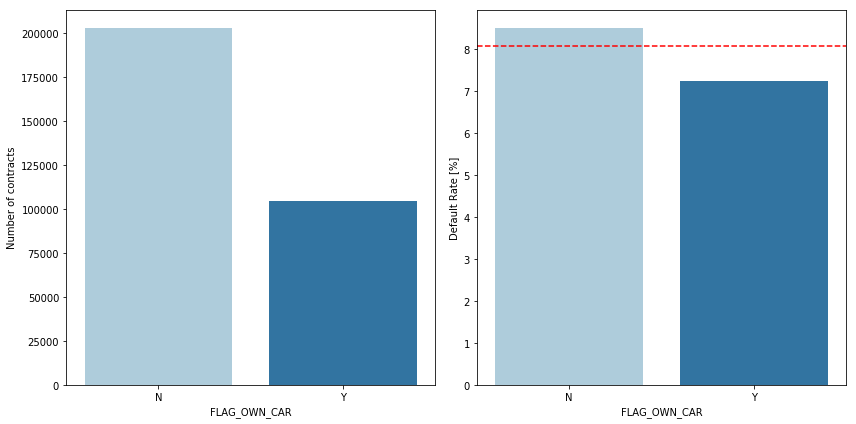

In [27]:
plot_stats('FLAG_OWN_CAR', False, False, True)

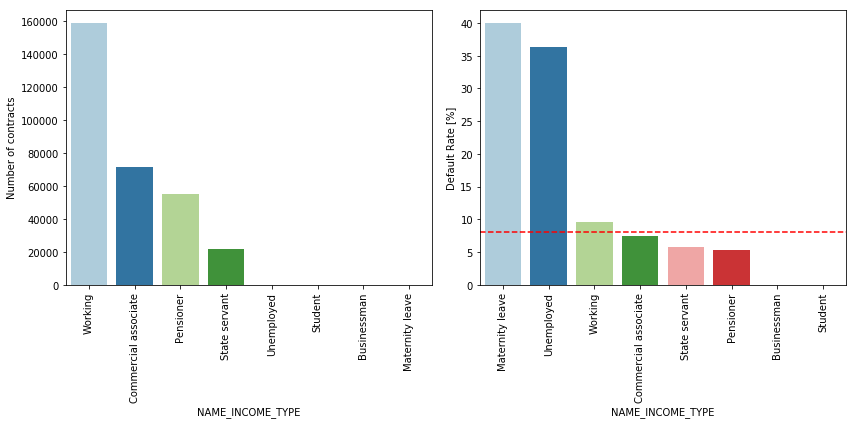

In [28]:
plot_stats('NAME_INCOME_TYPE', False, True, True)

55


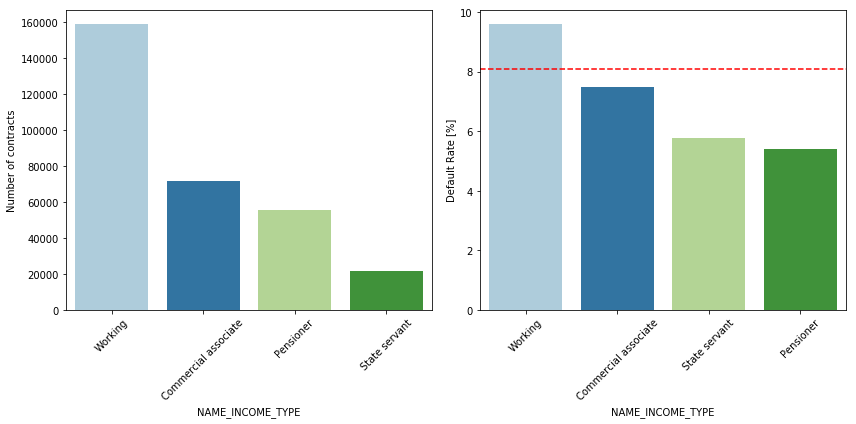

In [95]:
# exclude INCOME TYPE categories from plot, since there are only very few (55) of them:
list1 = ['Unemployed', 'Student', 'Businessman', 'Maternity leave'] 

#df.loc[df.NAME_INCOME_TYPE is in list1, 'NAME_INCOME_TYPE'].count()

print(len(df[df.NAME_INCOME_TYPE.isin(list1)]))
df_income = df[df.NAME_INCOME_TYPE.isin(list1) == False]

def plot_stats2(feature, label_rotation1=False, label_rotation2=False, horizontal_layout=True):
    
    temp = df_income[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    #cat_perc = df[[feature, 'TARGET']].groupby(feature, as_index=False).mean()
    cat_perc = df_income[[feature, 'TARGET']].groupby(feature).mean().mul(100)
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10,14))
    
    #sns.set_color_codes("pastel") # pastel
    sns.set_palette('Paired')
    s = sns.barplot(ax=ax1,
                    x=feature,
                    y="Number of contracts",
                    data=df1)    
    if(label_rotation1):
        s.set_xticklabels(s.get_xticklabels(),rotation=45)
    if(label_rotation2):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
        
    s = sns.barplot(ax=ax2,
                    #x=feature,
                    x=cat_perc.index,
                    y='TARGET',
                    #order=cat_perc[feature],
                    data=cat_perc)
    
    ax2.axhline(df_income.TARGET.mean()*100, ls='--', c='red', label='Mean')
    #ax2.text(1, df.TARGET.mean()*100+0.1, 'Mean of Target')
    #ax2.text(right, df.TARGET.mean()*100+0.1, 'Mean of Target')
    #plt.hlines(df.TARGET.mean()*100, xmin=0, xmax=1, ls='--', c='red', label='Mean')
    #if(label_rotation):
    #    s.set_xticklabels(s.get_xticklabels(),rotation=90)
        
    if(label_rotation1):
        s.set_xticklabels(s.get_xticklabels(),rotation=45)
    if(label_rotation2):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
        
    plt.ylabel('Default Rate [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    
    
    plt.tight_layout()
    plt.show()


    
plot_stats2('NAME_INCOME_TYPE', True, False, True)

#df.NAME_INCOME_TYPE.values

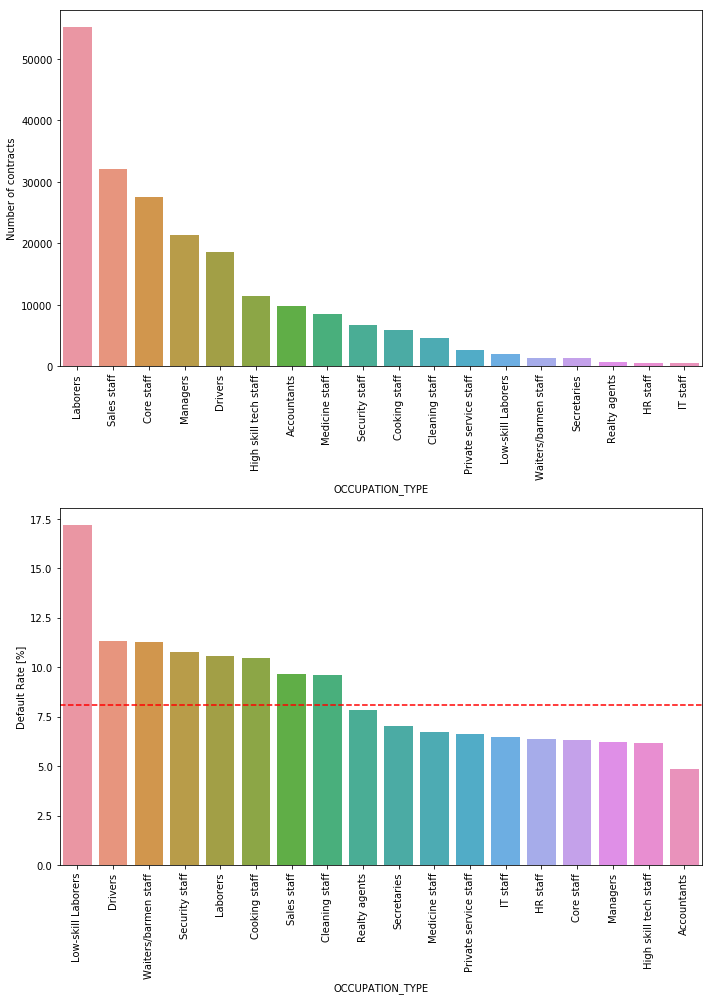

In [29]:
plot_stats('OCCUPATION_TYPE', False, True, False)

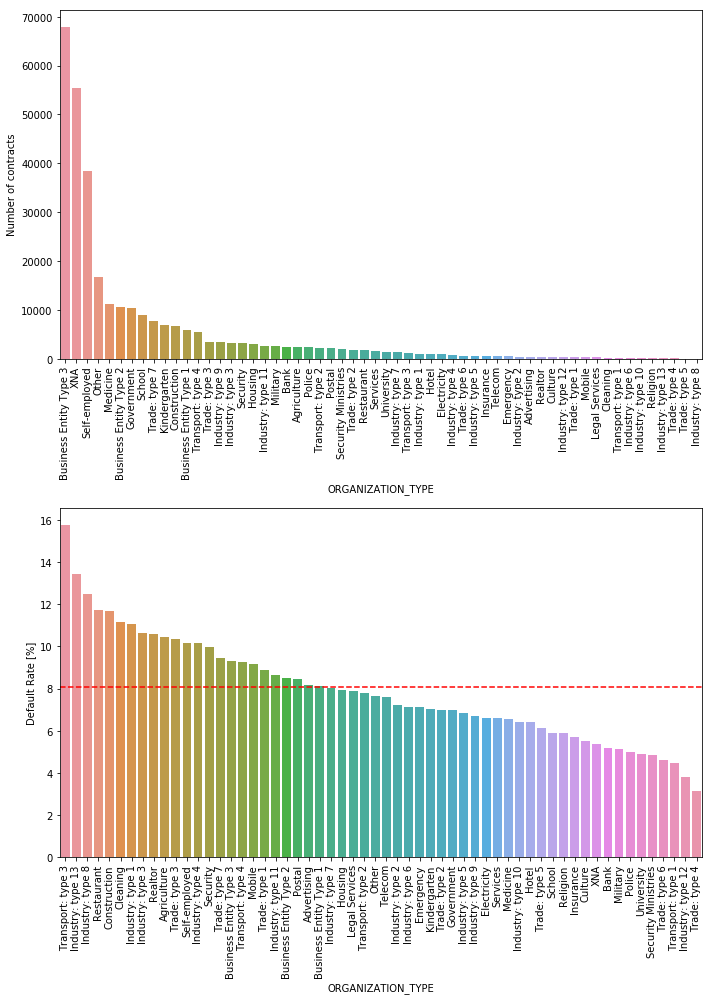

In [30]:
plot_stats('ORGANIZATION_TYPE', False, True, False)

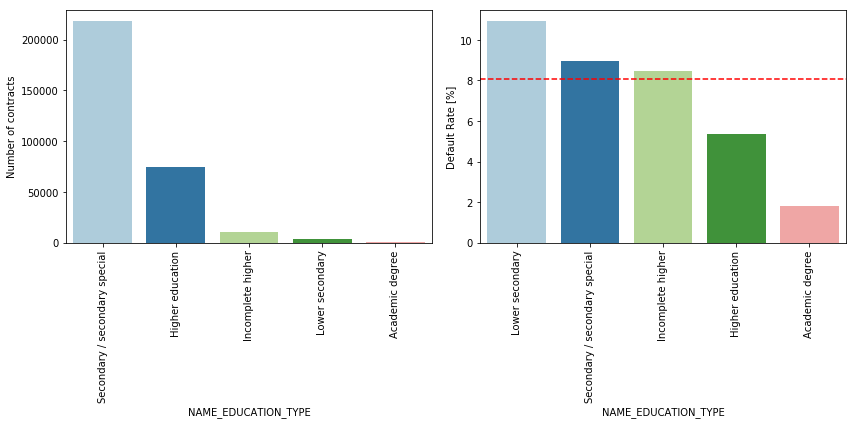

In [31]:
plot_stats('NAME_EDUCATION_TYPE', False, True, True)

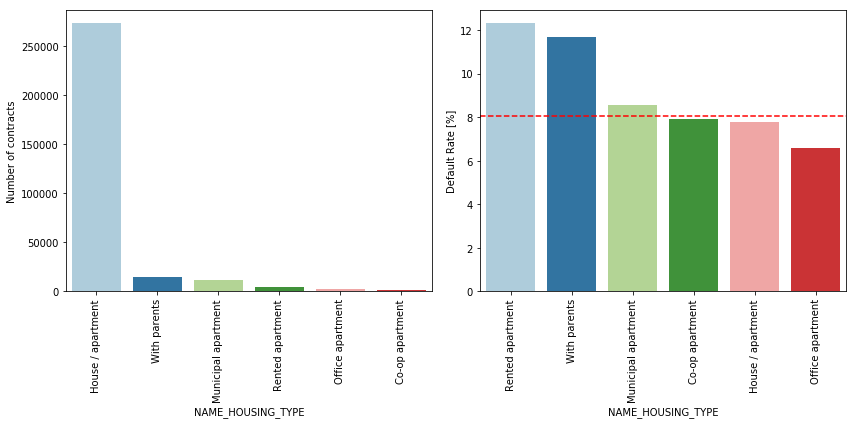

In [32]:
plot_stats('NAME_HOUSING_TYPE', False, True, True)

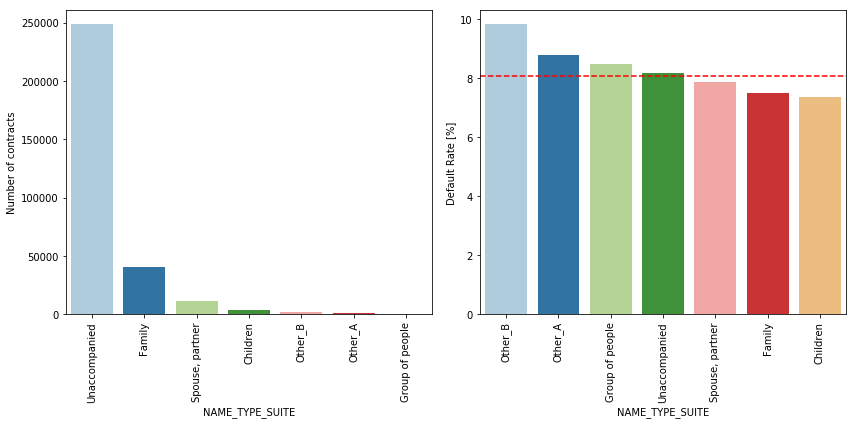

In [33]:
plot_stats('NAME_TYPE_SUITE', False, True, True)

In [34]:
#plot_stats('CREDIT_TYPE', False, True, True)

//anaconda3/envs/nf/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


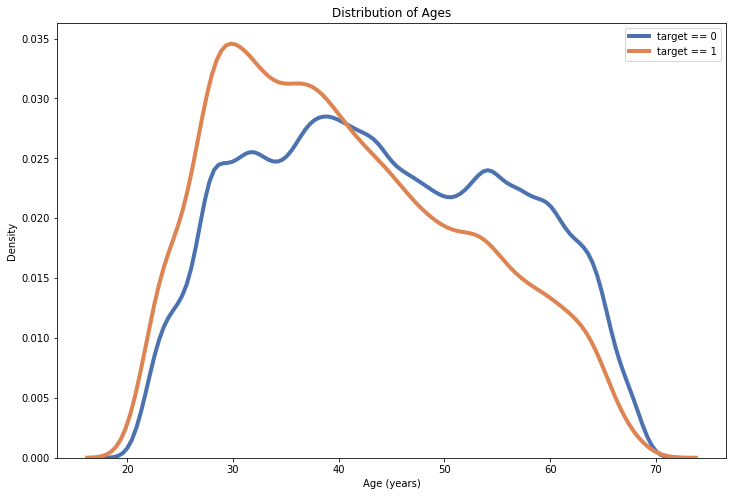

In [35]:
plt.figure(figsize = (12, 8))
sns.set_palette('deep')
joint_kws={'linewidths':5.0}

# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[df['TARGET'] == 0, 'DAYS_BIRTH'] / -365, label = 'target == 0', linewidth=4.0)
# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[df['TARGET'] == 1, 'DAYS_BIRTH'] / -365, label = 'target == 1', linewidth=4.0)
# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

//anaconda3/envs/nf/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
//anaconda3/envs/nf/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
//anaconda3/envs/nf/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


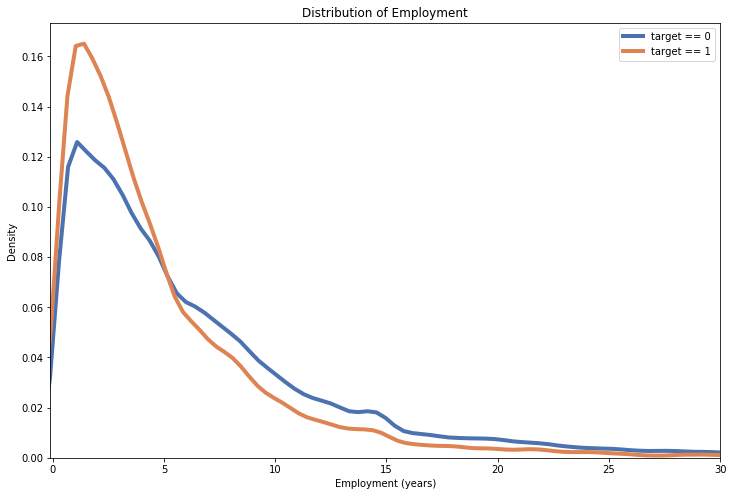

In [101]:
plt.figure(figsize = (12, 8))
sns.set_palette('deep')
joint_kws={'linewidths':5.0}

# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[df['TARGET'] == 0, 'DAYS_EMPLOYED'] / -365, label = 'target == 0', linewidth=4.0)
# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[df['TARGET'] == 1, 'DAYS_EMPLOYED'] / -365, label = 'target == 1', linewidth=4.0)
# Labeling of plot
plt.xlim(-0.1, 30)
plt.xlabel('Employment (years)'); plt.ylabel('Density'); plt.title('Distribution of Employment');

//anaconda3/envs/nf/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 2000000)

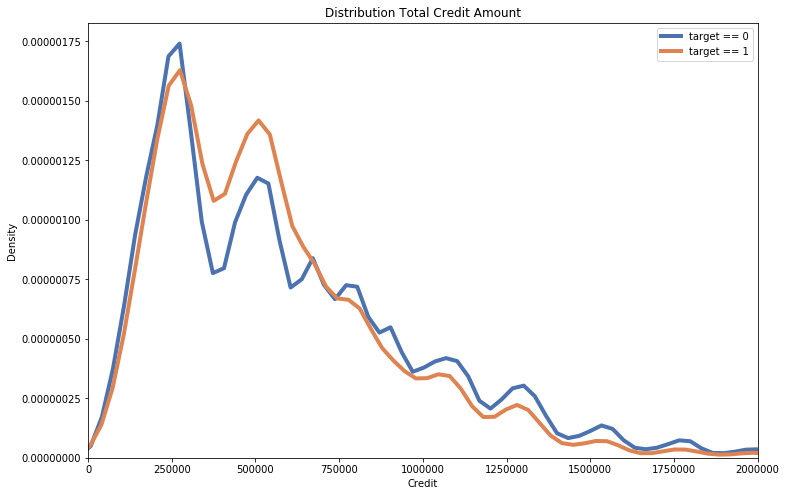

In [36]:
plt.figure(figsize = (12, 8))
sns.set_palette('deep')
joint_kws={'linewidths':5.0}

# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[df['TARGET'] == 0, 'AMT_CREDIT'], label = 'target == 0', linewidth=4.0)
# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[df['TARGET'] == 1, 'AMT_CREDIT'], label = 'target == 1', linewidth=4.0)
# Labeling of plot
plt.xlabel('Credit'); plt.ylabel('Density'); plt.title('Distribution Total Credit Amount');
plt.xlim(0, 2000000)

//anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


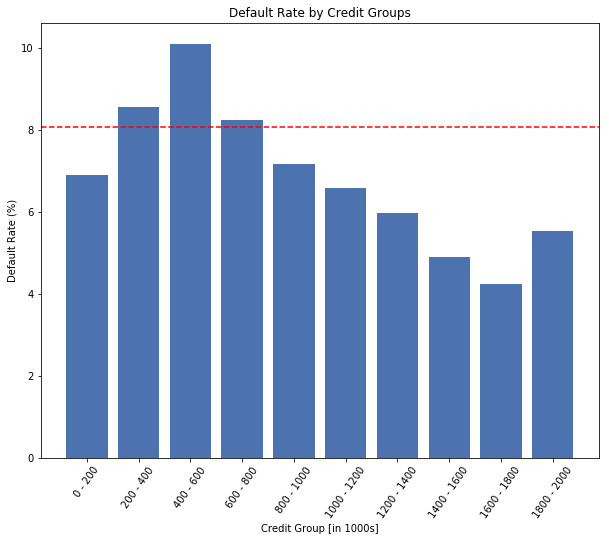

In [38]:
#sns.set_palette("RdBu_r", 7)
sns.set_palette('deep')


# Age information into a separate dataframe
credit_data = df[['TARGET', 'AMT_CREDIT']]

# Bin the age data
credit_data['CREDIT_BINNED'] = pd.cut(credit_data['AMT_CREDIT'], bins = np.linspace(0, 2000000, num = 11))
#age_data.head(10)
# Group by the bin and calculate averages
credit_groups  = credit_data.groupby('CREDIT_BINNED').mean()

credit_groups.index = ['0 - 200', '200 - 400', '400 - 600', '600 - 800', '800 - 1000', '1000 - 1200', '1200 - 1400', '1400 - 1600', '1600 - 1800', '1800 - 2000']

plt.figure(figsize = (10, 8))
# Graph the age bins and the average of the target as a bar plot
#plt.bar(credit_groups.index.astype(str), 100 * credit_groups['TARGET'])
plt.bar(credit_groups.index, 100 * credit_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 55)
#plt.xaxis.set(ticklabels=['0 - 200', '200 - 400', '400 - 600', '600 - 800', '800 - 1000', '1000 - 1200', '1200 - 1400',
#              '1400 - 1600', '1600 - 1800', '1800 - 2000'])
plt.axhline(df.TARGET.mean()*100, ls='--', c='red') #, label='Mean')
#plt.text(8, df.TARGET.mean()*100+0.1, 'Mean of Target')
plt.xlabel('Credit Group [in 1000s]')
plt.ylabel('Default Rate (%)')
plt.title('Default Rate by Credit Groups');

In [154]:
df.AMT_ANNUITY.median()

24903.0

In [91]:
df.groupby('TARGET')['AMT_ANNUITY'].median()

TARGET
0    24876.0
1    25263.0
Name: AMT_ANNUITY, dtype: float64

In [111]:
df.groupby('TARGET')['AMT_ANNUITY'].sum()

TARGET
0    7.678370e+09
1    6.574093e+08
Name: AMT_ANNUITY, dtype: float64

In [92]:
df.groupby('TARGET')['AMT_CREDIT'].median()

TARGET
0    517788.0
1    497520.0
Name: AMT_CREDIT, dtype: float64

In [112]:
df.groupby('TARGET')['AMT_CREDIT'].sum()

TARGET
0    1.703586e+11
1    1.384685e+10
Name: AMT_CREDIT, dtype: float64

In [113]:
df['AMT_CREDIT'].sum()

184205486695.5

In [114]:
df.shape

(307507, 122)

//anaconda3/envs/nf/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
//anaconda3/envs/nf/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
//anaconda3/envs/nf/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 100000)

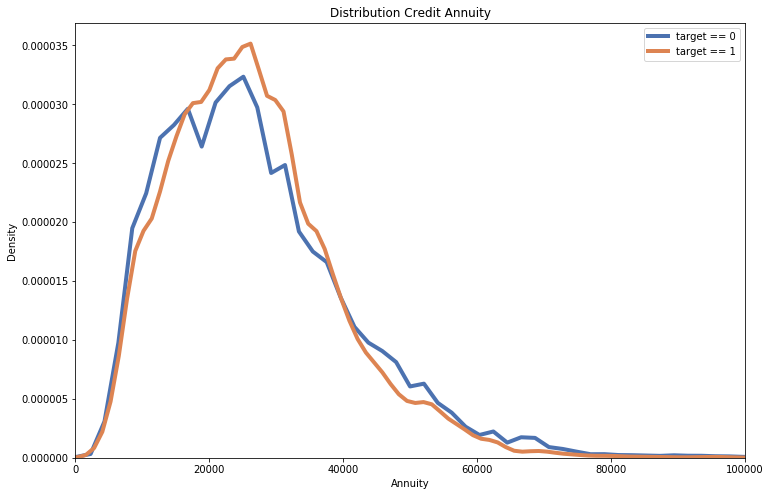

In [39]:
plt.figure(figsize = (12, 8))
sns.set_palette('deep')
joint_kws={'linewidths':5.0}

# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[df['TARGET'] == 0, 'AMT_ANNUITY'], label = 'target == 0', linewidth=4.0)
# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[df['TARGET'] == 1, 'AMT_ANNUITY'], label = 'target == 1', linewidth=4.0)
# Labeling of plot
plt.xlabel('Annuity'); plt.ylabel('Density'); plt.title('Distribution Credit Annuity');
plt.xlim(0, 100000)

//anaconda3/envs/nf/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
//anaconda3/envs/nf/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
//anaconda3/envs/nf/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


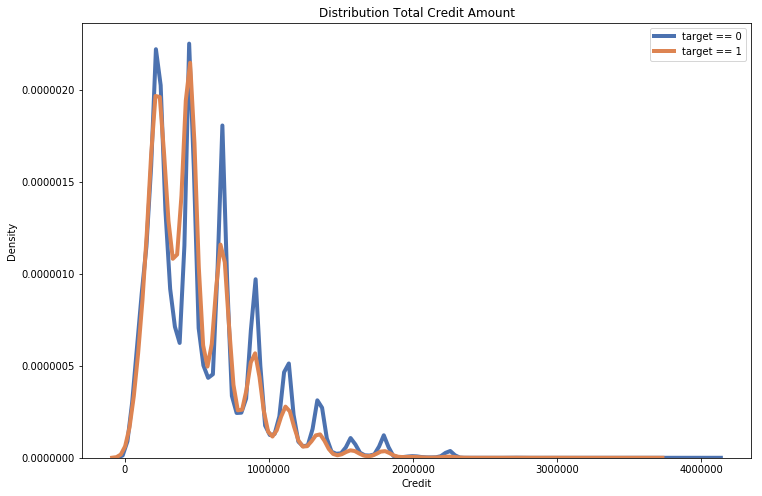

In [102]:
plt.figure(figsize = (12, 8))
sns.set_palette('deep')
joint_kws={'linewidths':5.0}

# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[df['TARGET'] == 0, 'AMT_GOODS_PRICE'], label = 'target == 0', linewidth=4.0)
# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[df['TARGET'] == 1, 'AMT_GOODS_PRICE'], label = 'target == 1', linewidth=4.0)
# Labeling of plot
plt.xlabel('Credit'); plt.ylabel('Density'); plt.title('Distribution Total Credit Amount');
#plt.xlim(0, 2000000)

In [56]:
#plt.figure(figsize = (12, 8))
#sns.set_palette('deep')
#joint_kws={'linewidths':5.0}

# KDE plot of loans that were repaid on time
#sns.kdeplot(df.loc[df['TARGET'] == 0, 'AMT_INCOME_TOTAL'], label = 'target == 0', linewidth=4.0)
# KDE plot of loans which were not repaid on time
#sns.kdeplot(df.loc[df['TARGET'] == 1, 'AMT_INCOME_TOTAL'], label = 'target == 1', linewidth=4.0)
# Labeling of plot
#plt.xlabel('Total Income'); plt.ylabel('Density'); plt.title('Distribution of Ages');
#plt.xlim(0, 4000000)

In [53]:
#sns.distplot(df.loc[df['TARGET'] == 1, 'AMT_INCOME_TOTAL'])

In [41]:
df.AMT_INCOME_TOTAL.median()

147150.0

In [46]:
df.AMT_INCOME_TOTAL.describe()

count    3.075070e+05
mean     1.687977e+05
std      2.371246e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [57]:
#df.AMT_INCOME_TOTAL.value_counts(ascending=False)

//anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
//anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


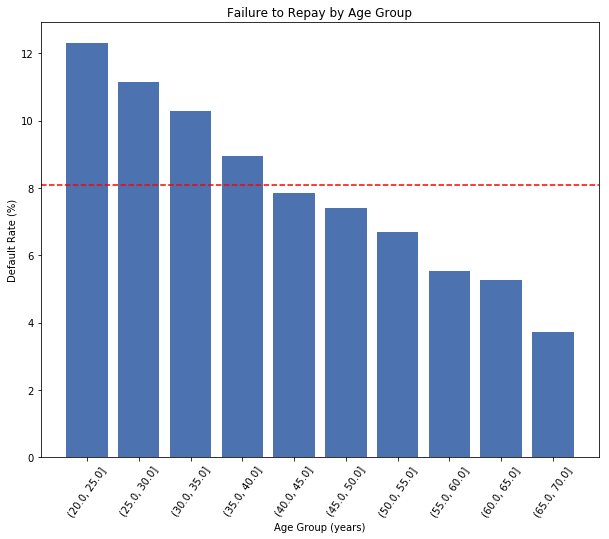

In [59]:
#sns.set_palette("RdBu_r", 7)
sns.set_palette('deep')


# Age information into a separate dataframe
age_data = df[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / -365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
#age_data.head(10)
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()

plt.figure(figsize = (10, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 55)
plt.axhline(df.TARGET.mean()*100, ls='--', c='red', label='Mean')
#plt.text(8, df2.TARGET.mean()*100+0.1, 'Mean of Target')
plt.xlabel('Age Group (years)')
plt.ylabel('Default Rate (%)')
plt.title('Failure to Repay by Age Group');

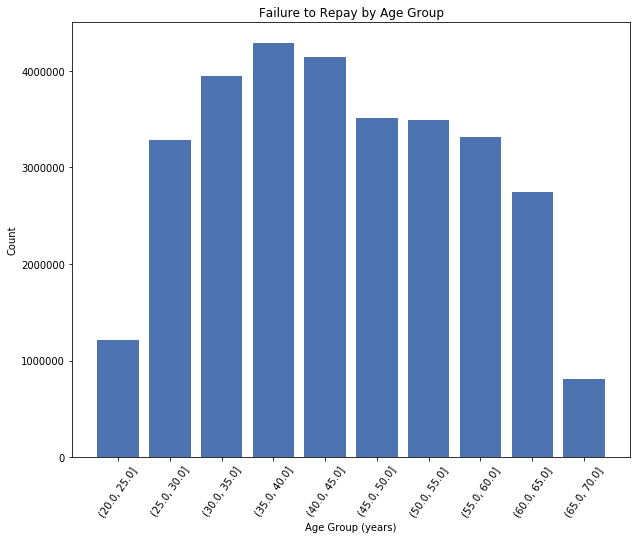

In [60]:
age_groups2  = age_data.groupby('YEARS_BINNED').count()

plt.figure(figsize = (10, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups2.index.astype(str), 100 * age_groups2['TARGET'])

# Plot labeling
plt.xticks(rotation = 55)
#plt.axhline(df.TARGET.mean()*100, ls='--', c='red', label='Mean')
#plt.text(8, df2.TARGET.mean()*100+0.1, 'Mean of Target')
plt.xlabel('Age Group (years)')
plt.ylabel('Count')
plt.title('Failure to Repay by Age Group');

//anaconda3/envs/nf/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
//anaconda3/envs/nf/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
//anaconda3/envs/nf/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


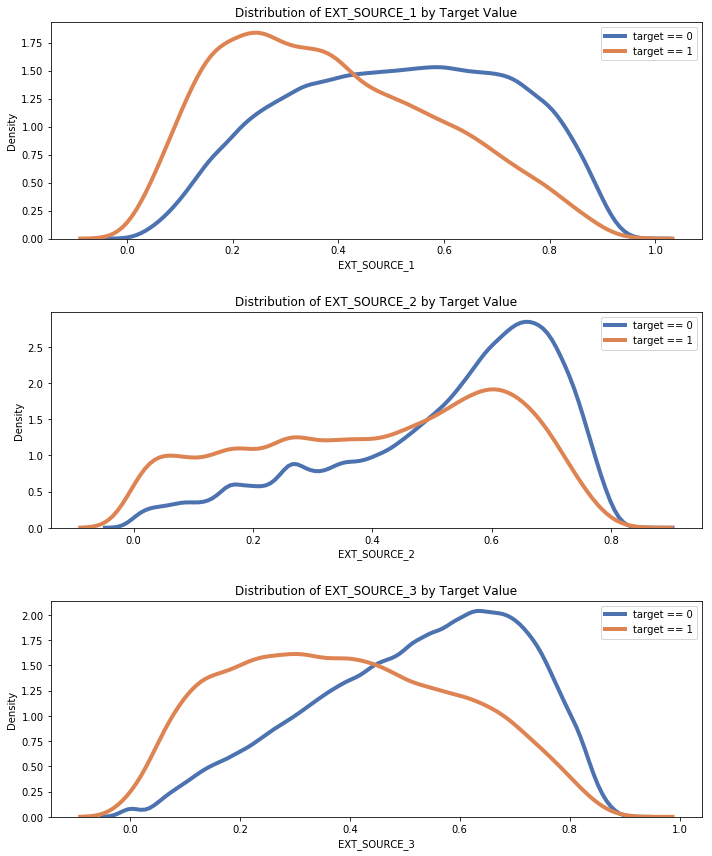

In [378]:
plt.figure(figsize = (10, 12))
sns.set_palette('deep')

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(df.loc[df['TARGET'] == 0, source], label = 'target == 0', linewidth=4.0)
    # plot loans that were not repaid
    sns.kdeplot(df.loc[df['TARGET'] == 1, source], label = 'target == 1', linewidth=4.0)
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

In [379]:
correlations = df.corr()['TARGET'].sort_values()
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 DEF_30_CNT_SOCIAL_CIRCLE       0.032261
LIVE_CITY_NOT_WORK_CITY        0.032517
OWN_CAR_AGE                    0.037611
DAYS_REGISTRATION              0.041976
FLAG_DOCUMENT_3                0.044341
REG_CITY_NOT_LIVE_CITY         0.044394
FLAG_EMP_PHONE                 0.045984
REG_CITY_NOT_WORK_CITY         0.050992
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055219
REGION_RATING_CLIENT           0.058901
REGION_RATING_CLIENT_W_CITY    0.060895
DAYS_EMPLOYED                  0.074957
DAYS_BIRTH                     0.078242
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178926
EXT_SOURCE_2                 -0.160471
EXT_SOURCE_1                 -0.155317
AMT_GOODS_PRICE              -0.039647
REGION_POPULATION_RELATIVE   -0.037225
AMT_CREDIT                   -0.030371
FLAG_DOCUMENT_6              -0.028603
HOUR_APPR_PROCESS_START      -0.024164


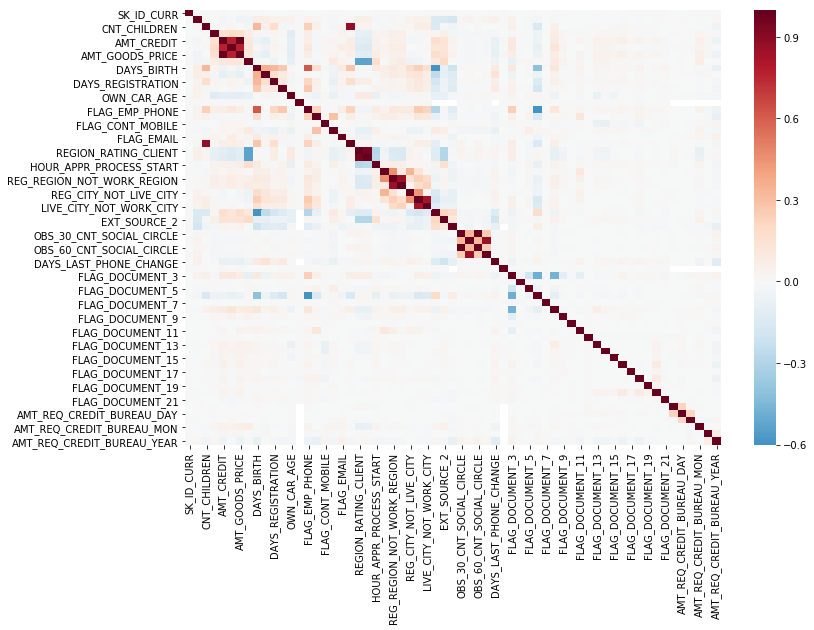

In [380]:
corr_mat1 = df.corr()
plt.subplots(figsize=(12,8))
sns.heatmap(corr_mat1, cmap='RdBu_r', center=0.0)

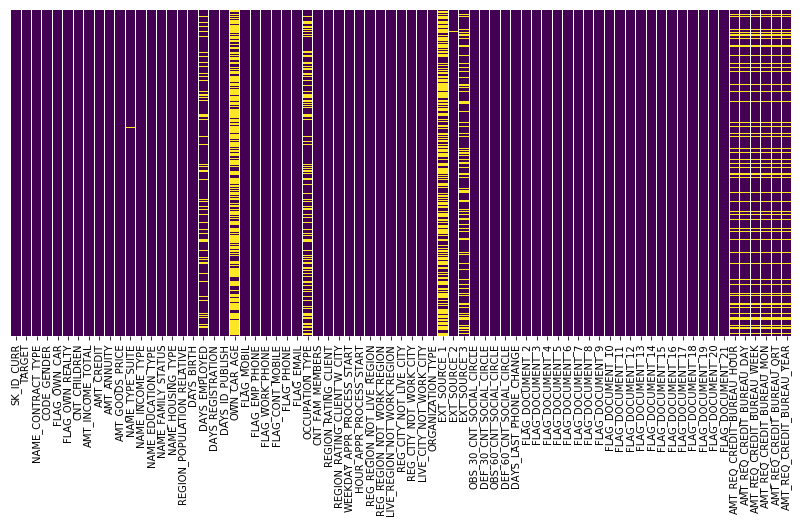

In [382]:
%matplotlib inline
plt.figure(figsize=(14,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [383]:
# Imputing, Scaling, Balancing, Dummy Variables
# ----> cleaned data set to new csv file
# ----> keep uncleaned dataset for comparison

## Imputing, Scaling, Balancing, Dummy Variables:

In [384]:
# keep dataframe for reference:
df3 = df.copy

In [400]:
from sklearn.impute import SimpleImputer
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.preprocessing import MinMaxScaler


df_clean1 = pd.get_dummies(df)
df_clean1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307507 entries, 0 to 307510
Columns: 186 entries, SK_ID_CURR to ORGANIZATION_TYPE_XNA
dtypes: float64(23), int64(40), uint8(123)
memory usage: 196.2 MB


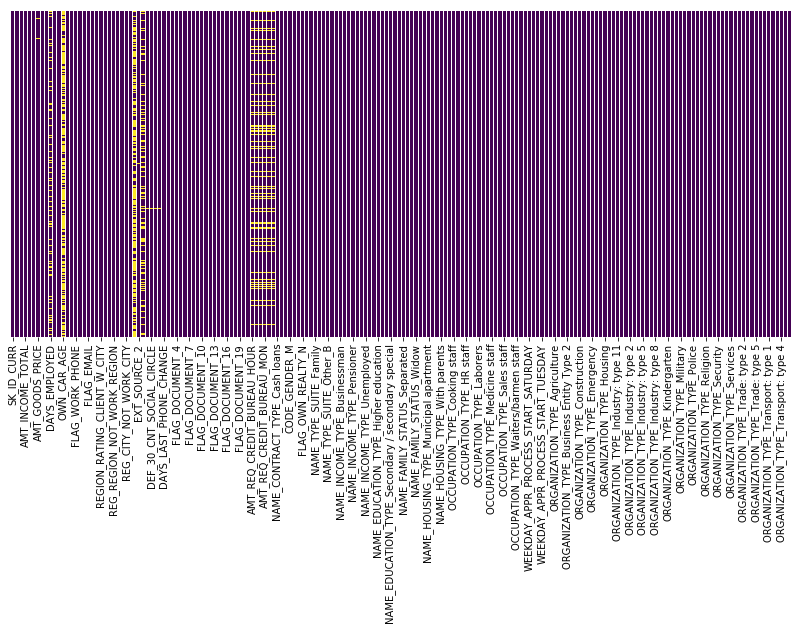

In [401]:
%matplotlib inline
plt.figure(figsize=(14,6))
sns.heatmap(df_clean1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [386]:
df_clean1.to_csv('/Users/dbuettner/nf-ds/Week_6/Group_Project/Data/application_data_clean.csv', index=False)

In [414]:
#df_clean1.columns

In [415]:
#df_clean2 = df_clean1.copy()
# Median imputation of missing values
#imputer = SimpleImputer(strategy = 'median')
# Scale each feature to 0-1
#scaler = MinMaxScaler(feature_range = (0, 1))

# Imputing and Scaling
#imputer.fit(df_clean2)
#cols = df_clean2.columns
#df_clean2 = imputer.transform(df_clean2)
#df_clean2 = scaler.fit_transform(df_clean2)

# Rebuild Dataframe
#df_clean2 = pd.DataFrame(df, columns=cols)
#y = df_clean2.TARGET
#X = df_clean2.drop(columns=['TARGET'], axis=1)

In [441]:
# drop
df_clean2 = df_clean1.copy()
y = df_clean2.TARGET
X = df_clean2.drop(['TARGET'], axis=1)
X = pd.DataFrame(X)
#X.columns = df2.drop('TARGET', axis=1).columns
    
# Feature names
features = list(X.columns)

# Median imputation of missing values
imputer = SimpleImputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(X)

# Transform both training and testing data
X = imputer.transform(X)

# Repeat with the scaler
scaler.fit(X)
X = scaler.transform(X)

In [429]:
#X = pd.DataFrame(X, columns=features)
#X.columns

In [431]:
#X['ORGANIZATION_TYPE_Transport: type 1'].isnull().sum()

In [432]:
#X['ORGANIZATION_TYPE_Transport: type 1'].notnull().sum()

In [443]:
# run random under sampler with choosen sampling_strategy (1 = 50%/50%)
RUS = RandomUnderSampler(random_state=10)
X_resampled, y_resampled = RUS.fit_resample(X, y)
#y_resampled.shape
print(sorted(Counter(y_resampled).items()))

[(0, 24825), (1, 24825)]


In [447]:
#cols = list(df4.columns.values)
#cols.remove('TARGET')
cols = features.copy()

In [448]:
X_resampled = pd.DataFrame(X_resampled, columns=cols)
y_resampled = pd.DataFrame(y_resampled, columns=['TARGET'])
#y_resampled.info()

df_clean3 = pd.concat([y_resampled, X_resampled], axis=1)
df_clean3.info()
df_clean3.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49650 entries, 0 to 49649
Columns: 186 entries, TARGET to ORGANIZATION_TYPE_XNA
dtypes: float64(185), int64(1)
memory usage: 70.5 MB


,TARGET,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,...,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,0,0.035469,0.000000,0.000550,0.118921,0.116550,0.102132,0.257000,0.965220,0.982470,0.674084,0.934973,0.098901,1.0,1.0,1.0,1.0,0.0,0.0,0.052632,0.5,0.5,0.695652,0.0,0.0,0.0,0.0,0.0,0.0,0.192977,0.796042,0.540853,0.000000,0.0,0.000000,0.0,0.846925,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.12,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.168010,0.000000,0.000935,0.101124,0.039996,0.102132,1.000000,0.522717,0.9751

In [449]:
df_clean3.to_csv('/Users/dbuettner/nf-ds/Week_6/Group_Project/Data/application_data_clean_im_sca_bal.csv', index=False)

In [450]:
df_clean3.shape

(49650, 186)

# Conclusions:

- 300000 rows of data, 121 feature variables
- many missing values (>60-70%) throughout features containing information about housing situation (--> excluded)
- highly imbalanced dataset regarding the TARGET variable 'defaulted, not paid' (8/92 for classes 1 and 0)
- many interesting patterns across the default rates for different features:
- external index informations seem relevant features for further predictive modelling, as well es features such as credit amount or the age of the borrower (the younger, the higher the default rate)

# Future Work:

- Include pensioners and set DAYS_EMPLOYED-Values to max
- Include other datasets (Bureau, ...)
- Include, compare to data from other countries/markets
- Analysis of default rates for different intended purposes